# 선형모델
-선형함수를 만들어서 예측
-- 특성이 많은 데이터셋일 경우 예측의 정확성이 높아짐

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import sparse
import sys
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from scipy import sparse
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


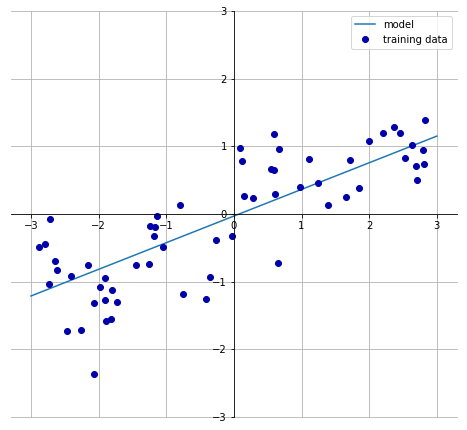

In [32]:
mglearn.plots.plot_linear_regression_wave()

선형 회귀 (최소제곱법)
예측과 훈련세트에 있는 타깃 y사이의 평균제곱 오차를 최소화하는 파라미터 w,b를 찾음
매개변수가 없는것이 장점 but 모델의 복잡도 제어 x

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr =LinearRegression().fit(X_train, y_train)

기울기 파라미터(w)는 가중치(weight) 또는 계수(coefficient)라고 하고 lr객체의 coef_ 속성에 저장되어있고 편향offset 또는 절편(intercept) 파라미터(b)는 intercept_에 저장

In [34]:
print('lr.coef_ : {}'.format(lr.coef_))
print('lr.intercept_ : {}'.format(lr.intercept_))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [35]:
print('훈련세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련세트 점수 : 0.67
테스트세트 점수 : 0.66


R^2값이 0.66이 좋은 결과는 아님 but 훈련세트점수와 테스트세트 점수 비슷 => 과소적합

다음으로 데이터셋이 복잡한 보스턴 주택가격 데이터(샘플 506개 특성은 105개) 읽어오고, 훈련/테스트 세트로 나눈 후 선형모델 만듦

In [36]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

훈련세트에서는 예측이 매우 정확하지만 테스트세트에서는 R^2값이 매우 낮음
=> 훈련데이터와 테스트 데이터의 성능의 차이는 과대적합 되었다는 것을 의미함
복잡도를 제어할 수 있는 모델 need
==> 릿지회귀 이용

In [37]:
print("훈련세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련세트 점수: 0.95
테스트세트 점수: 0.61


# 릿지 회귀
릿지(ridge)도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것 같은 예측함수 사용. 
but 릿지 회귀에서의 가중치(w) 선택은 훈련데이터 예측 위해 + 추가 제약조건만족 위한 목정 있음
가중치의 절댓값을 가능한 작게, w의 모든 원소가 0에 가깝게 되길 원함.
이런 제약을 규제(regulation)이라고 함. 릿지 회귀에서의 규제방식을 L2 규제라고 함

릿지회귀는 linear_model.Ride에 있음 -- 보스턴 주택가격 데이터셋에 적용

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


훈련세트에서의 점수는  LinearRegression보다 낮지만 테스트 세터에 대한 점수는 더 높음
선형회귀는 이 데이터셋에 과대적합 but Ridge는 덜 자유로운 모델이라서 과대적합이 적어짐
모델의 복잡도가 낮아짐녀 훈련세트의 성능은 나빠지지만, 더 일반화된 모델이 됨
테스트 세트 점수에 관심있기 때문에 Ridge 모델 사용해야함

Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련세트에 대한 성능 사이를 절충할 방법 제공
사용자는 alpha 매개변수로 훈련세트의 성능대비 단순화 방법 지정가능
앞선 내용에서는 기본값 alpha=1,0 사용
alpha값을 높이면 훈련세트 성능은 나빠지지만 일반화에는 도움

In [39]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련세트 점수: 0.79
테스트세트 점수: 0.64


 alpha 값을 줄이면 계수에 대한 제약이 풀리면서 과소적합에 가까워지게 됨
 아주 작은 alpha값은 계수를 거의 제약하지 않으므로 LinearRegression으로 만든 모델과 유사해짐

In [40]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련세트 점수: 0.93
테스트 세트 점수: 0.77


In [41]:
alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사해보면 alpha 매개변수가 모델을 어떻게 변경시키는지 이해가능
높은 alpha 값은 제약이 많아 작은 alpha값보다 coef_의 절댓값의 크기가 작을 것으로 예상 가능

SyntaxError: invalid syntax (<ipython-input-41-c9257d402e89>, line 1)

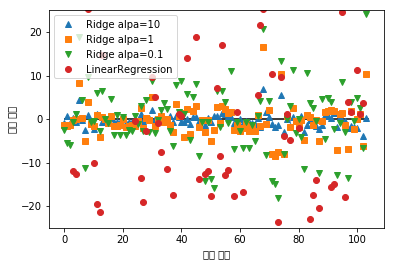

In [42]:
plt.plot(ridge10.coef_, '^', label='Ridge alpa=10')
plt.plot(ridge.coef_, 's', label='Ridge alpa=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpa=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

이 그림에서 x축은 coef_의 원소를 위치대로 나열한 것. 
    즉 x=0은 첫번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수, 이렇게 x= 100까지 계속됨
y축은 각 계수의 수치를 의미함.
    alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치함. alpha=1일때 Ridge모델의 계수는 좀 더 커지고 alpha=0.1일때는 더 커짐
    아무런 규제가 없는(alpha=0)인 선형 회귀의 계수는 값이 더 커져 그림 밖으로 나감
    
규제의 효과를 이해하는 다른 방법은 alpha 값을 고정하고 훈련데이터의 크기를 변화시키는 것
    아래의 그래프는 보스턴 주택가격 데이터셋에서 여러 크기로 샘프링해서 LinearRegression과 Rideg(alpha=1)을 적용한 것(학습곡선)

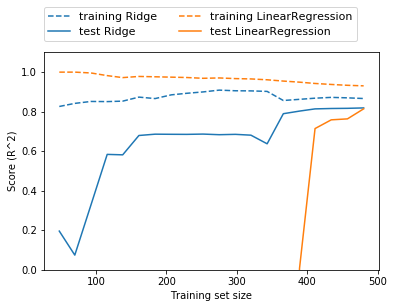

In [43]:
mglearn.plots.plot_ridge_n_samples()

모든 데이터셋에서 릿지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음
릿지에서는 규제거 적용되어 릿지의 훈련데이터 점수가 전체적으로 선형 회귀보다 낮음
but 테스트 데이터에서는 릿지의 점수가 더 높고 작은데이터에서는 더 높음
데이터의 크기가 커질수록 점수가 높아짐, 마지막에는 선형외귀가릿지를 따라잡음
=> 데이터를 충분히 줌녀 규제 항은 덜 중요해져 릿지 회귀와 선형 회귀의 성능이 같아짐.

# 라쏘
선형 회귀에 규제를 적용하는 데 Ride의 대안으로 Lasso가 있음. 릿지 회귀에서와 같이 라쏘도 계수를 0에 가깝게 하려고 함.
하지만 방식이 다르고 이를 L1규제라고 함
    L1규제의 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 됨, 이 말은 모델에서 완전히 제외되는 특성이 생기는 것
    일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성을 보여줌

In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

훈련세트 점수: 0.29
테스트세트 점수: 0.21
사용한 특성의 수: 4


Lasso는 훈련세트와 테스트세트 모두에서결과가 좋지 않음.
그 이유는 과소적합했기 때문이고, 105개 특성중 4갬나 사용한 것으로 볼 수 있음
Ridge와 마찬가지고 Lasso도 계수를 얼마나 강하게 0으로 보낼 지 alpha 매개변수를 지원함
앞에서는 기본값인 alpha=1.0을 사용함.
과소적합을 줄이기 위해 alpha값을 줄이고, 이를 위해서는 max_iter(반복실행하는 최대횟수)의 기본값을 늘려야 함

In [45]:
# 'max_iter' 기본값ㅇ르 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생함
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('훈련세트 점수 : {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트세트 점수 : {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso001.coef_ !=0)))

훈련세트 점수 : 0.90
테스트세트 점수 : 0.77
사용한 특성의 수 : 33


alpha값을 낮추면 모델의 복잡도가 증가해 훈련세트와 테스트세트에서의 성능이 좋아짐
성능은 Ridge보다 조금 좋지만 특성은 105개 중 33개 뿐이라서 모델을 분석하기 더 쉬움

하지만 alpha값을 너무 낮추면 규제의 효과가 없어져 과대적합되므로 LinearRegression과 비슷함

In [49]:
lasso00001= Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련세트 점수: 0.90
테스트세트 점수: 0.77
사용한 특성의 수: 33


Text(0,0.5,'Coefficient magnitude')

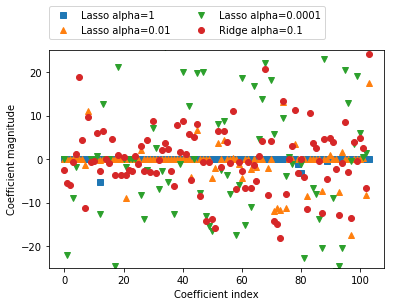

In [50]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

alpha=1 일때 계수 대부분이 0 이고 나머지 계수도 작음
alpha를 0.01로 줄이면 대부분의 특성이 0이됨
alpha=0.1인 Ridge모델은 alpha=0.01인 라쏘와 성능이 비슷하지만 Ridge모델로는 어떤 계수도 0이 되지 않음.

보통 릿지회귀를 선호하지만 특성이 많고 일부만 원한다면 Lasso가 더 좋을 수 있음.